In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
games = pd.read_csv('games.csv')

In [4]:
print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


In [5]:
games.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,81312.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000
mean,72278.150138,1806.630668,1.992018,5.637703,51.634788,49.276833,51.634788,6.983975,161.886585,4.212144,1.157632,262.502509,9.236423,12.688890,42.719144,49.290031,16.488009,0.908083
std,58818.237742,588.517834,0.931034,56.076890,345.699969,334.483934,345.699969,5.035138,1145.978126,3.056551,2.340033,1504.536693,39.757408,60.764207,239.292628,284.862853,115.980285,1.176002
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21339.750000,1984.000000,2.000000,2.000000,8.000000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43258.000000,2003.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,2.000000,5.265620,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,128836.500000,2010.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,16.000000,6.718777,0.000000,51.000000,2.000000,3.000000,7.000000,9.000000,2.000000,1.916700
max,184451.000000,2018.000000,99.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


In [6]:
pd.DataFrame(games['type'].value_counts())

,type
boardgame,70820
boardgameexpansion,10492


In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81312 entries, 0 to 81311
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    81312 non-null  int64  
 1   type                  81312 non-null  object 
 2   name                  81271 non-null  object 
 3   yearpublished         81309 non-null  float64
 4   minplayers            81309 non-null  float64
 5   maxplayers            81309 non-null  float64
 6   playingtime           81309 non-null  float64
 7   minplaytime           81309 non-null  float64
 8   maxplaytime           81309 non-null  float64
 9   minage                81309 non-null  float64
 10  users_rated           81312 non-null  int64  
 11  average_rating        81312 non-null  float64
 12  bayes_average_rating  81312 non-null  float64
 13  total_owners          81312 non-null  int64  
 14  total_traders         81312 non-null  int64  
 15  total_wanters      

In [8]:
games.isna().sum()

id                       0
type                     0
name                    41
yearpublished            3
minplayers               3
maxplayers               3
playingtime              3
minplaytime              3
maxplaytime              3
minage                   3
users_rated              0
average_rating           0
bayes_average_rating     0
total_owners             0
total_traders            0
total_wanters            0
total_wishers            0
total_comments           0
total_weights            0
average_weight           0
dtype: int64

In [9]:
games = games.dropna(axis=0)

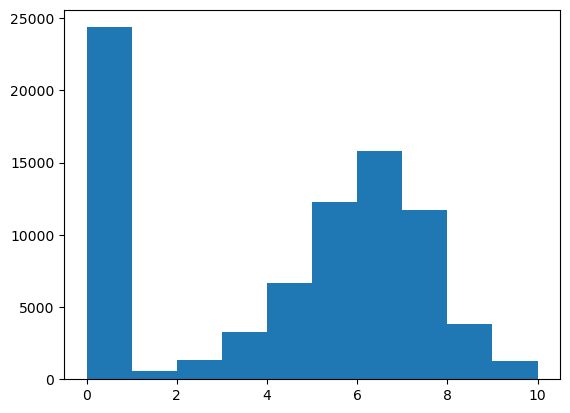

In [10]:
plt.hist(games["average_rating"])
plt.show()

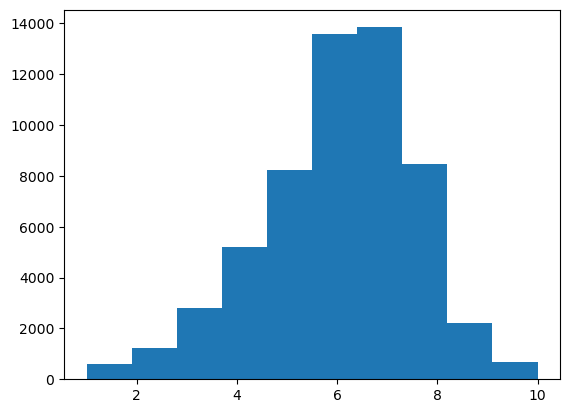

In [11]:
games = games[games["users_rated"] > 0]

plt.hist(games["average_rating"])
plt.show();

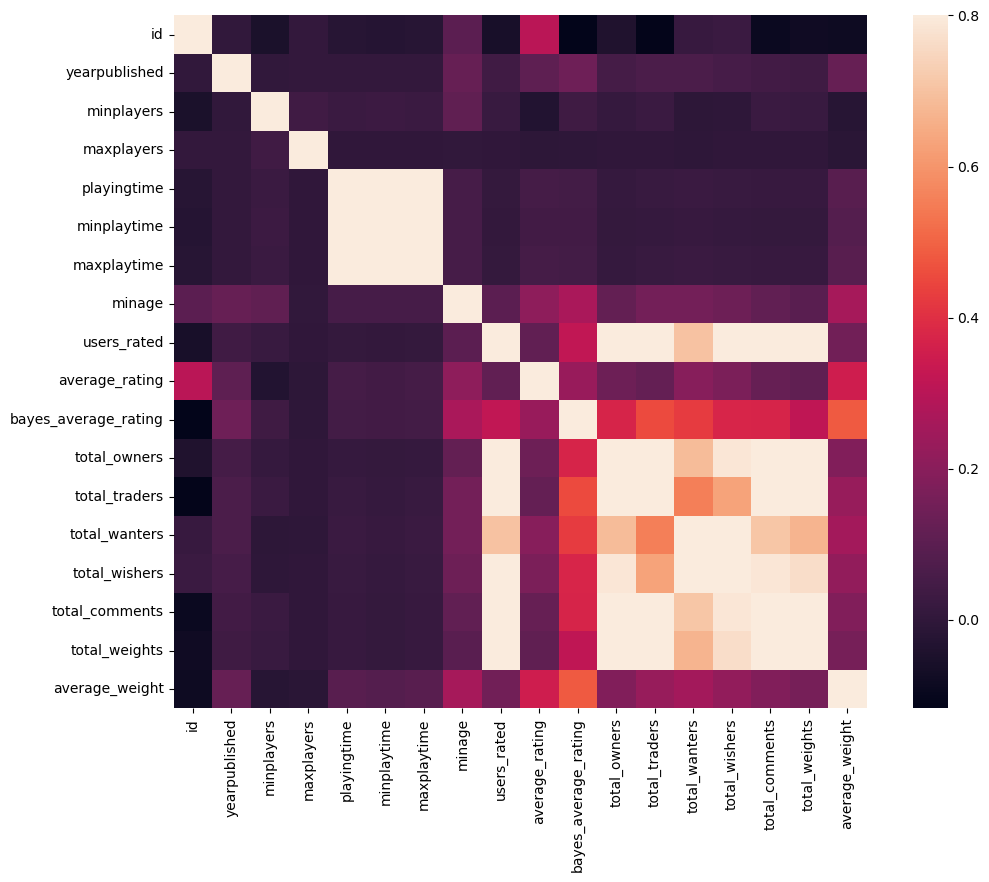

In [12]:
corrmat = games.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

In [13]:
columns = games.columns.tolist()
columns

['id',
 'type',
 'name',
 'yearpublished',
 'minplayers',
 'maxplayers',
 'playingtime',
 'minplaytime',
 'maxplaytime',
 'minage',
 'users_rated',
 'average_rating',
 'bayes_average_rating',
 'total_owners',
 'total_traders',
 'total_wanters',
 'total_wishers',
 'total_comments',
 'total_weights',
 'average_weight']

In [14]:
X = games.drop(["id","type","name","average_rating","bayes_average_rating"],axis = 1).values

In [15]:
Y = games['average_rating'].values

In [16]:
X


array([[2.0050e+03, 2.0000e+00, 2.0000e+00, ..., 5.3470e+03, 2.5620e+03,
        3.4785e+00],
       [2.0120e+03, 2.0000e+00, 5.0000e+00, ..., 2.5260e+03, 1.4230e+03,
        3.8939e+00],
       [2.0130e+03, 1.0000e+00, 7.0000e+00, ..., 1.7000e+03, 7.7700e+02,
        3.7761e+00],
       ...,
       [2.0150e+03, 2.0000e+00, 6.0000e+00, ..., 2.0000e+00, 1.0000e+00,
        1.0000e+00],
       [2.0120e+03, 2.0000e+00, 2.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0150e+03, 2.0000e+00, 4.0000e+00, ..., 0.0000e+00, 2.0000e+00,
        1.5000e+00]])

In [17]:
Y

array([8.33774, 8.28798, 8.28994, ..., 8.     , 7.     , 7.     ])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [19]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, min_samples_leaf=10, random_state = 1)
regressor.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=10, random_state=1)

In [20]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[6.98 7.07]
 [6.09 6.4 ]
 [6.11 5.97]
 ...
 [6.48 5.81]
 [7.35 5.9 ]
 [6.23 5.84]]


In [21]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.4110744087493965
1.4575555838357181
